In [11]:
from b_asic.core_operations import Addition, ConstantMultiplication, SymmetricTwoportAdaptor
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output
from b_asic.sfg_generators import wdf_allpass

# old assignments
a1 = -0.068129
a3 = -0.242429
a5 = -0.461024
a7 = -0.678715
a9 = -0.888980

a10 = 0.4573
a11 = -0.2098
a12 = 0.5695
a13 = -0.2123
a14 = 0.0952
a15 = -0.2258
a16 = -0.4490

na1  = a10
na2  = a11
na3  = a12
na4  = a13
na5  = a14
na6  = a15
na7  = a16

na8  = a1
na9  = a5
na10 = a9
na11 = a3
na12 = a7

# na11 = na16 & na21
# na12 = na17 & na22 
# na8  = na13 & na18
# na9  = na14 & na19
# na10 = na15 & na20 
na16 = na11
na21 = na11

na17 = na12
na22 = na12

na13 = na8
na18 = na8

na14 = na9
na19 = na9

na15 = na10
na20 = na10

Wf = 11

na1_q  = round(na1 * 2**Wf) * 2**(-Wf)
na3_q  = round(na3 * 2**Wf) * 2**(-Wf)
na5_q  = round(na5 * 2**Wf) * 2**(-Wf)
na7_q  = round(na7 * 2**Wf) * 2**(-Wf)
na9_q  = round(na9 * 2**Wf) * 2**(-Wf)

na10_q = round(na10 * 2**Wf) * 2**(-Wf)
na11_q = round(na11 * 2**Wf) * 2**(-Wf)
na12_q = round(na12 * 2**Wf) * 2**(-Wf)
na13_q = round(na13 * 2**Wf) * 2**(-Wf)
na14_q = round(na14 * 2**Wf) * 2**(-Wf)
na15_q = round(na15 * 2**Wf) * 2**(-Wf)
na16_q = round(na16 * 2**Wf) * 2**(-Wf)

na17_q = round(na17 * 2**Wf) * 2**(-Wf)
na18_q = round(na18 * 2**Wf) * 2**(-Wf)
na19_q = round(na19 * 2**Wf) * 2**(-Wf)
na20_q = round(na20 * 2**Wf) * 2**(-Wf)
na21_q = round(na21 * 2**Wf) * 2**(-Wf)
na22_q = round(na22 * 2**Wf) * 2**(-Wf)

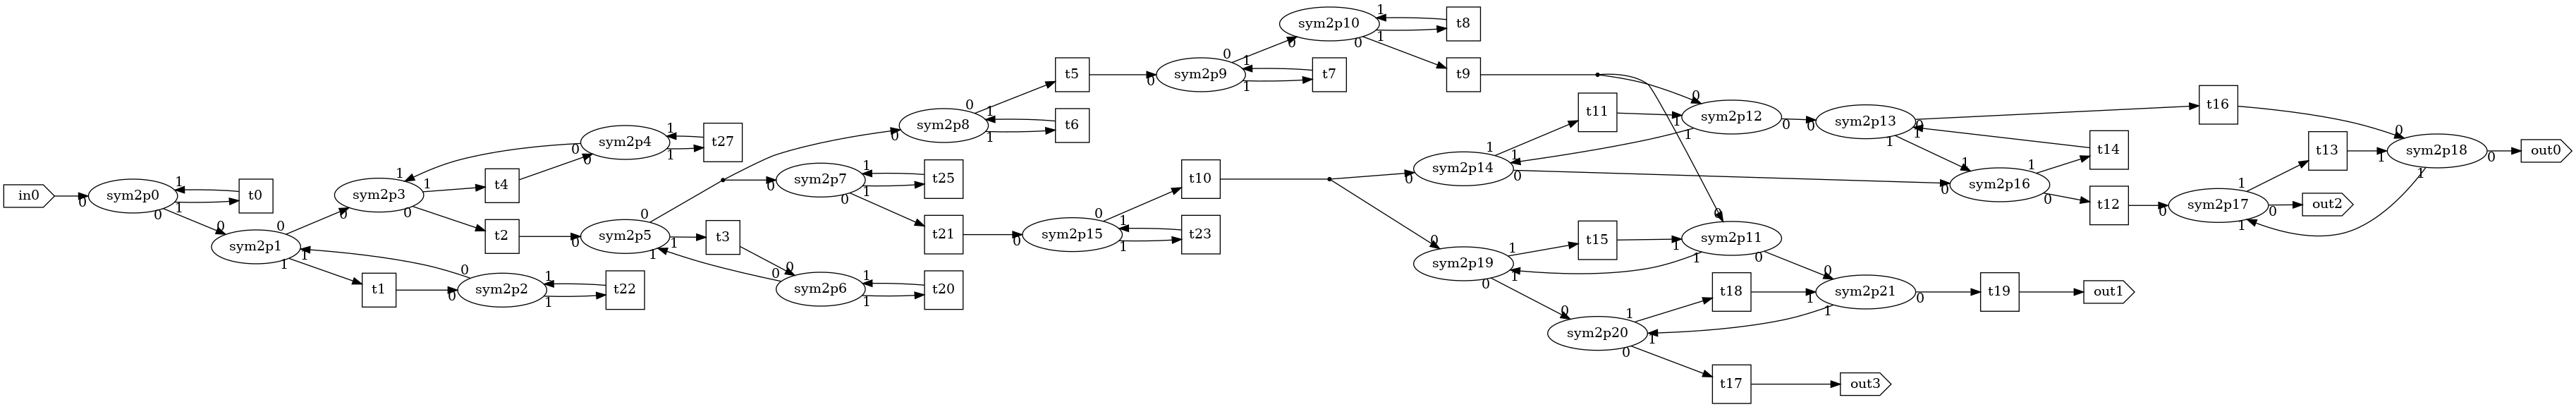

In [12]:

#####################################
# Inputs/Outputs
#####################################
x = Input()
y0 = Output()
y1 = Output()
y2 = Output()
y3 = Output()

#####################################
# Upper filter (H_AP)
#####################################

# Create WDFs and delays
T1      = Delay()
T2      = Delay()
T3      = Delay()
T4      = Delay()
T5      = Delay()
T6      = Delay()
T7      = Delay()
sta_1   = SymmetricTwoportAdaptor(na1)
sta_2   = SymmetricTwoportAdaptor(na2)
sta_3   = SymmetricTwoportAdaptor(na3)
sta_4   = SymmetricTwoportAdaptor(na4)
sta_5   = SymmetricTwoportAdaptor(na5)
sta_6   = SymmetricTwoportAdaptor(na6)
sta_7   = SymmetricTwoportAdaptor(na7)

# Connect single delays to STA
T1 <<= sta_1.output(1)
sta_1.input(1).connect(T1)
T3 <<= sta_3.output(1)
sta_3.input(1).connect(T3)
T5 <<= sta_5.output(1)
sta_5.input(1).connect(T5)
T7 <<= sta_7.output(1)
sta_7.input(1).connect(T7)

# Connect vertically
T2 <<= sta_2.output(1)
sta_3.input(0).connect(T2)
sta_2.input(1).connect(sta_3.output(0))
T4 <<= sta_4.output(1)
sta_5.input(0).connect(T4)
sta_4.input(1).connect(sta_5.output(0))
T6 <<= sta_6.output(1)
sta_7.input(0).connect(T6)
sta_6.input(1).connect(sta_7.output(0))

# Connect STAs horizontally
sta_2.input(0).connect(sta_1.output(0))
sta_4.input(0).connect(sta_2.output(0))
sta_6.input(0).connect(sta_4.output(0))

# Connect input
sta_1.input(0).connect(x)

######################################
## First bottom filter (8-12)
######################################

# Create STAs and delays
T8  = Delay()
T9  = Delay()
T10 = Delay()
T11 = Delay()
T12 = Delay()
sta_8  = SymmetricTwoportAdaptor(na8)
sta_9  = SymmetricTwoportAdaptor(na9)
sta_10 = SymmetricTwoportAdaptor(na10)
sta_11 = SymmetricTwoportAdaptor(na11)
sta_12 = SymmetricTwoportAdaptor(na12)

# Connect delays
T8 <<= sta_8.output(1)
sta_8.input(1).connect(T8)
T9 <<= sta_9.output(1)
sta_9.input(1).connect(T9)
T10 <<= sta_10.output(1)
sta_10.input(1).connect(T10)
T11 <<= sta_11.output(1)
sta_11.input(1).connect(T11)
T12 <<= sta_12.output(1)
sta_12.input(1).connect(T12)

# Connect STAs horizontally
sta_9.input(0).connect(sta_8.output(0))
sta_10.input(0).connect(sta_9.output(0))
sta_12.input(0).connect(sta_11.output(0))

# Connect input/output
sta_11.input(0).connect(sta_6.output(0))
sta_8.input(0).connect(sta_6.output(0))

#####################################
# Middle bottom filter (16,17,21,22)
#####################################

# Create STAs and delays
T_21_16 = Delay()
T_22_17 = Delay()
sta_21 = SymmetricTwoportAdaptor(na21)
sta_16 = SymmetricTwoportAdaptor(na16)
sta_22 = SymmetricTwoportAdaptor(na22)
sta_17 = SymmetricTwoportAdaptor(na17)

# Connect delays
T_21_16 <<= sta_21.output(1)
sta_17.input(1).connect(T_22_17)
T_22_17 <<= sta_22.output(1)
sta_16.input(1).connect(T_21_16)

# Connect STAs vertically
sta_21.input(1).connect(sta_16.output(1))
sta_22.input(1).connect(sta_17.output(1))

# Connect STAs horizontally
sta_22.input(0).connect(sta_21.output(0))
sta_17.input(0).connect(sta_16.output(0))

# Connect inputs
sta_16.input(0).connect(sta_10.output(0))
sta_21.input(0).connect(sta_12.output(0))

# Connect outputs
y3 <<= sta_22.output(0)
y1 <<= sta_17.output(0)

#####################################
# Last filter (13,14,15,18,19,20)
#####################################

# Create STAs and delays
T_18_13 = Delay()
T_19_14 = Delay()
T_20_15 = Delay()
sta_13 = SymmetricTwoportAdaptor(na13)
sta_14 = SymmetricTwoportAdaptor(na14)
sta_15 = SymmetricTwoportAdaptor(na15)
sta_18 = SymmetricTwoportAdaptor(na18)
sta_19 = SymmetricTwoportAdaptor(na19)
sta_20 = SymmetricTwoportAdaptor(na20)

# Connect delays
T_18_13 <<= sta_18.output(1)
sta_13.input(1).connect(T_18_13)
T_19_14 <<= sta_19.output(1)
sta_14.input(1).connect(T_19_14)
T_20_15 <<= sta_20.output(1)
sta_15.input(1).connect(T_20_15)

# Connect STAs vertically
sta_18.input(1).connect(sta_13.output(1))
sta_19.input(1).connect(sta_14.output(1))
sta_20.input(1).connect(sta_15.output(1))

# Connect STAs horizontally
sta_19.input(0).connect(sta_18.output(0))
sta_20.input(0).connect(sta_19.output(0))

sta_14.input(0).connect(sta_13.output(0))
sta_15.input(0).connect(sta_14.output(0))

# Connect inputs
sta_18.input(0).connect(sta_12.output(0))
sta_13.input(0).connect(sta_10.output(0))

# Connect outputs
y0 <<= sta_15.output(0)
y2 <<= sta_20.output(0)

######################################
# Naming
######################################

# Naming upper filter
##T1.graph_id = "T1"
##T2.graph_id = "T2"
##T3.graph_id = "T3"
##T4.graph_id = "T4"
##T5.graph_id = "T5"
##T6.graph_id = "T6"
##T7.graph_id = "T7"
#sta_1.graph_id = "1"
#sta_2.graph_id = "2"
#sta_3.graph_id = "3"
#sta_4.graph_id = "4"
#sta_5.graph_id = "5"
#sta_6.graph_id = "6"
#sta_7.graph_id = "7"
#
## Naming first bottom filter
##T8.graph_id = "T8"
##T9.graph_id = "T9"
##T10.graph_id = "T10"
##T11.graph_id = "T11"
##T12.graph_id = "T12"
#sta_8.graph_id = "8"
#sta_9.graph_id = "9"
#sta_10.graph_id = "10"
#sta_11.graph_id = "11"
#sta_12.graph_id = "12"
#
## Naming middle bottom filter
##T_21_16.graph_id = "T21"
##T_22_17.graph_id = "T22"
#sta_21.graph_id = "21"
#sta_16.graph_id = "16"
#sta_22.graph_id = "22"
#sta_17.graph_id = "17"
#
## Naming last filter
##T_18_13.graph_id = "T18"
##T_19_14.graph_id = "T19"
##T_20_15.graph_id = "T20"
#sta_13.graph_id = "13"
#sta_14.graph_id = "14"
#sta_15.graph_id = "15"
#sta_18.graph_id = "18"
#sta_19.graph_id = "19"
#sta_20.graph_id = "20"

#####################################
# Build
#####################################
sfg = SFG([x], [y0, y1, y2, y3])
T_pipe_4 = Delay()
T_pipe_9 = Delay()
T_pipe_10 = Delay()
T_pipe_11 = Delay()
T_pipe_12 = Delay()
T_pipe_14 = Delay()
T_pipe_17 = Delay()
T_pipe_19 = Delay()
T_pipe_22 = Delay()

#T_pipe_4.graph_id = "TP4"
#T_pipe_9.graph_id = "TP9"
#T_pipe_12.graph_id = "TP12"
#T_pipe_14.graph_id = "TP14"
#T_pipe_17.graph_id = "TP17"
#T_pipe_19.graph_id = "TP19"
#T_pipe_22.graph_id = "TP22"

pipelined = sfg.insert_operation_after("sym2p3.0", T_pipe_4)
pipelined = pipelined.insert_operation_after("sym2p8.0", T_pipe_9)
pipelined = pipelined.insert_operation_after("sym2p10.0", T_pipe_10)
pipelined = pipelined.insert_operation_after("sym2p7.0", T_pipe_11)
pipelined = pipelined.insert_operation_after("sym2p15.0", T_pipe_12)
pipelined = pipelined.insert_operation_after("sym2p13.0", T_pipe_14)
pipelined = pipelined.insert_operation_after("sym2p21.0", T_pipe_17)
pipelined = pipelined.insert_operation_after("sym2p16.0", T_pipe_19)
pipelined = pipelined.insert_operation_after("sym2p20.0", T_pipe_22)
pipelined

2. In this task we will use the schedule of the single rate realization of the interpolator filter from Task 2 of Laboratory work 3. Make sure that you save all results! 

a) To avoid concurrent reads and writes, increase the time resolution of the schedule by a factor of two and reschedule. 

In [13]:
from b_asic.schedule import Schedule 
from b_asic.core_operations import Addition, ConstantMultiplication

pipelined.set_execution_time_of_type(SymmetricTwoportAdaptor.type_name(), 8)
pipelined.set_latency_of_type(SymmetricTwoportAdaptor.type_name(), 15)

# gör en trappa
# börja på jämna
schedule = Schedule(pipelined, cyclic=True, schedule_time=48)
schedule = schedule.edit()

AttributeError: 'NoneType' object has no attribute 'id_number_offset'

schedule.move_operation('out3', 1)


AttributeError: 'NoneType' object has no attribute 'id_number_offset'

AttributeError: 'NoneType' object has no attribute 'id_number_offset'

schedule.move_operation('out3', 1)


AttributeError: 'NoneType' object has no attribute 'id_number_offset'

b) Extract the memory variables and partition the memories using memories with one read and one write port with at most one concurrent memory access. How many memories are required? 

In [ ]:
from b_asic.architecture import Memory

mem_vars = schedule.get_memory_variables()
direct, mem_vars = mem_vars.split_on_length()
mem_vars_set = mem_vars.split_on_ports(read_ports=1, write_ports=1, total_ports=1)

print("Memories:\t\t", len(mem_vars_set))

Memories:		 3


c) Apply the left edge algorithm and determine the number of cells required. 

/home/raswa151/courses/tste87/B-ASIC/b_asic/architecture.py:267: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # type: ignore


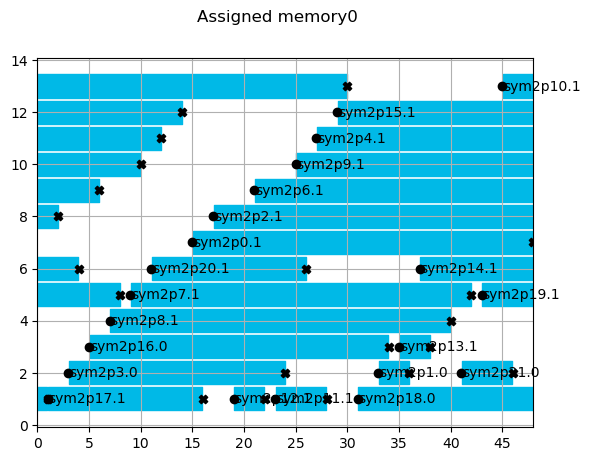

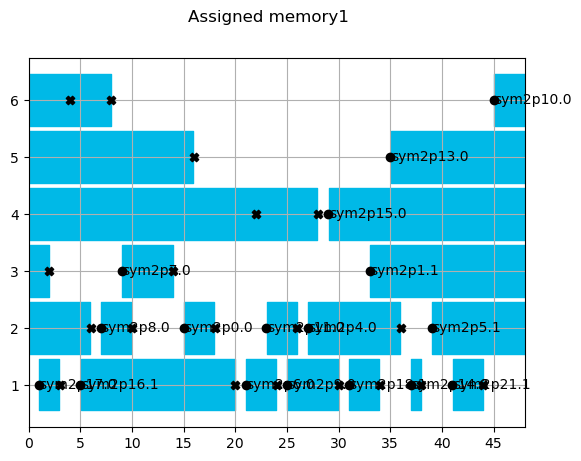

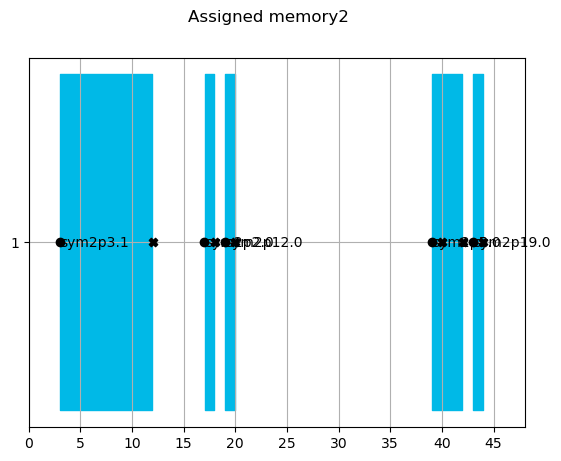

In [ ]:
memories = []
for i, mem in enumerate(mem_vars_set):
    memory = Memory(mem, memory_type="RAM", entity_name=f"memory{i}")
    memories.append(memory)
    #mem.show(title=f"{memory.entity_name}")
    memory.assign("left_edge")
    memory.show_content(title=f"Assigned {memory.entity_name}")

Answer:

See above

d) Perform processing element assignment and determine the number of PEs. 

In [ ]:
from b_asic.architecture import ProcessingElement
from b_asic.architecture import Architecture

ops = schedule.get_operations()
tpas = ops.get_by_type_name("sym2p").split_on_execution_time()
print(len(tpas))
ins = ops.get_by_type_name("in")
outs = ops.get_by_type_name("out")

p0 = ProcessingElement(tpas[0], entity_name="tpas_0")
p1 = ProcessingElement(tpas[1], entity_name="tpas_1")
p2 = ProcessingElement(tpas[2], entity_name="tpas_2")
p3 = ProcessingElement(tpas[3], entity_name="tpas_3")
p4 = ProcessingElement(tpas[4], entity_name="tpas_4")
p5 = ProcessingElement(tpas[5], entity_name="tpas_5")
p_in = ProcessingElement(ins, entity_name="input")
p_out = ProcessingElement(outs, entity_name="output")

6


Answer:

See above bör behövas fyra

e) Analyse the interconnect and try to minimize the number of PE ports connected to each memory.

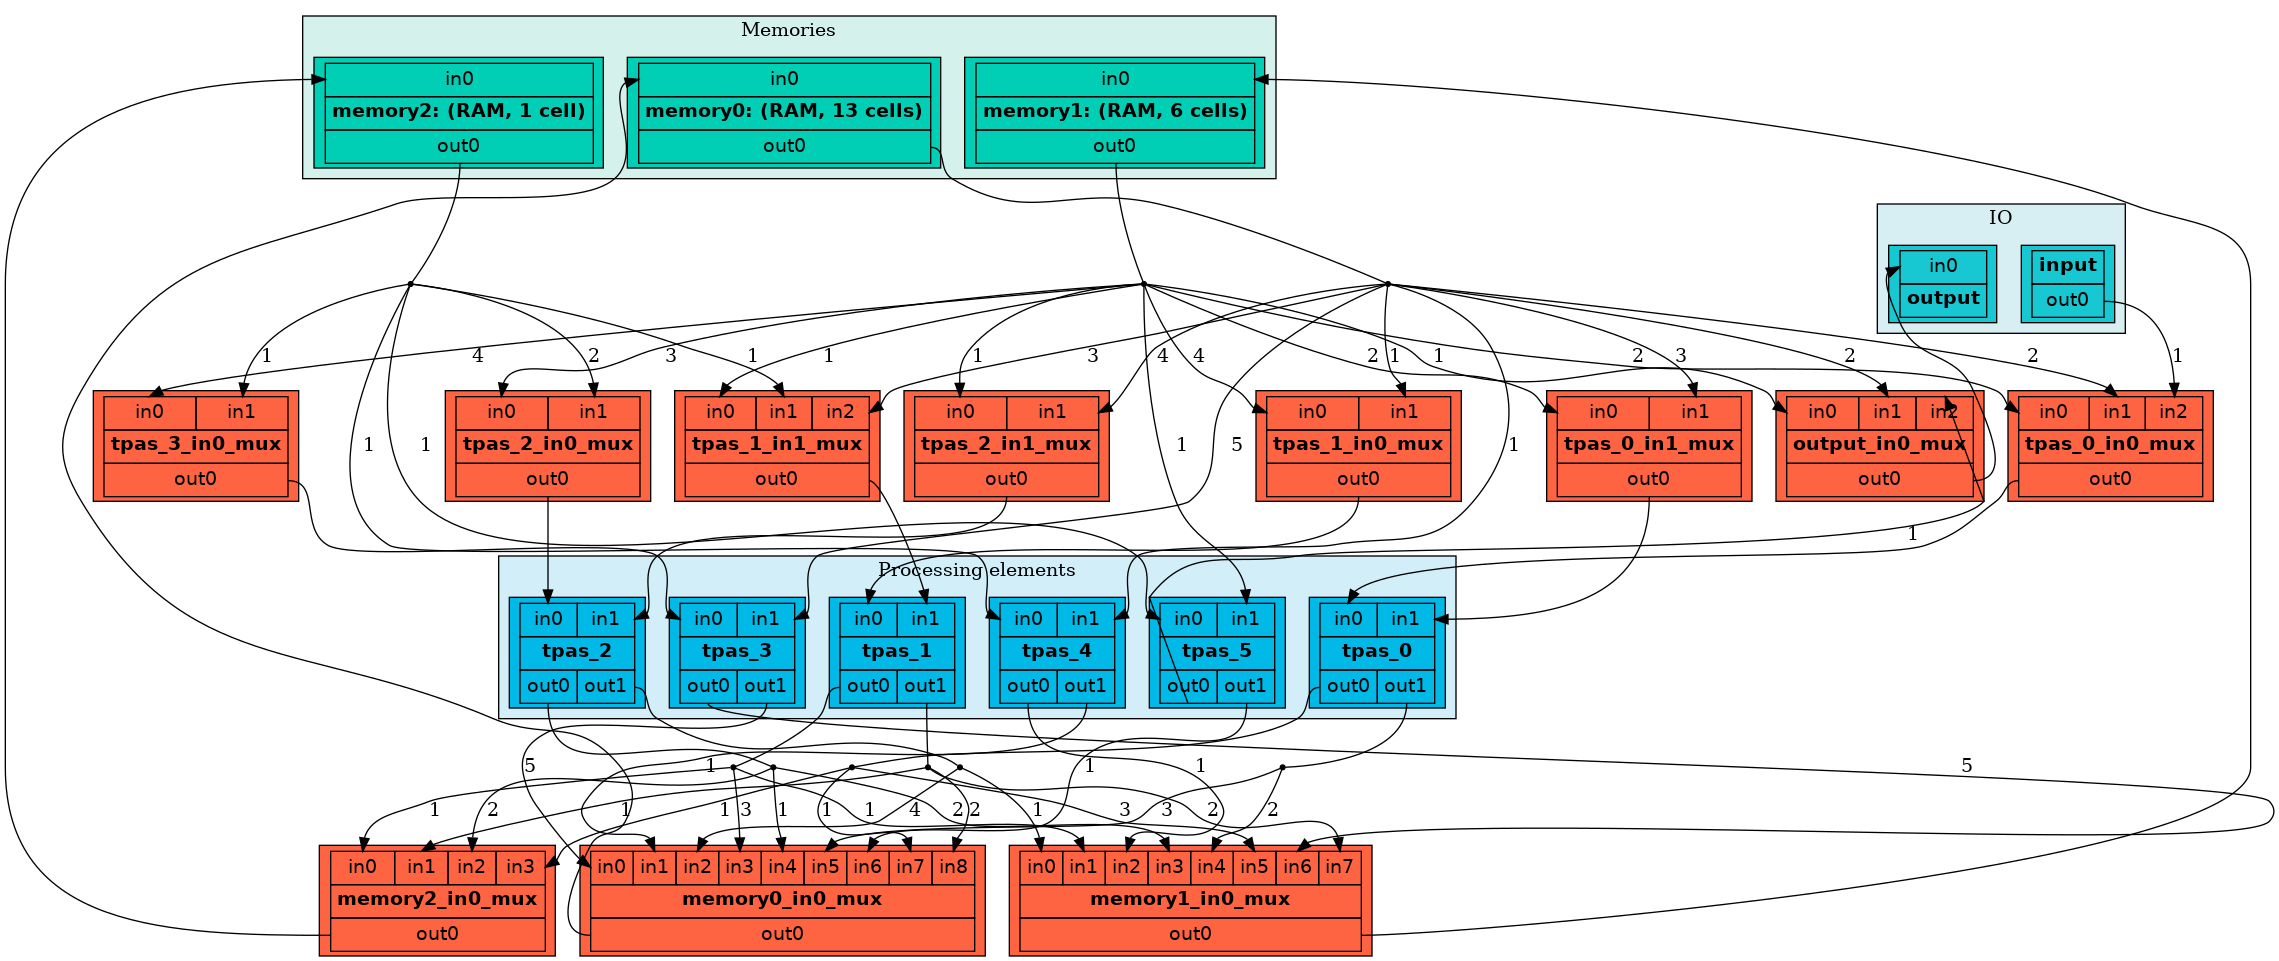

In [ ]:
arch = Architecture({p0, p1, p2, p3, p4, p5, p_in, p_out}, memories, direct_interconnects=direct)
arch

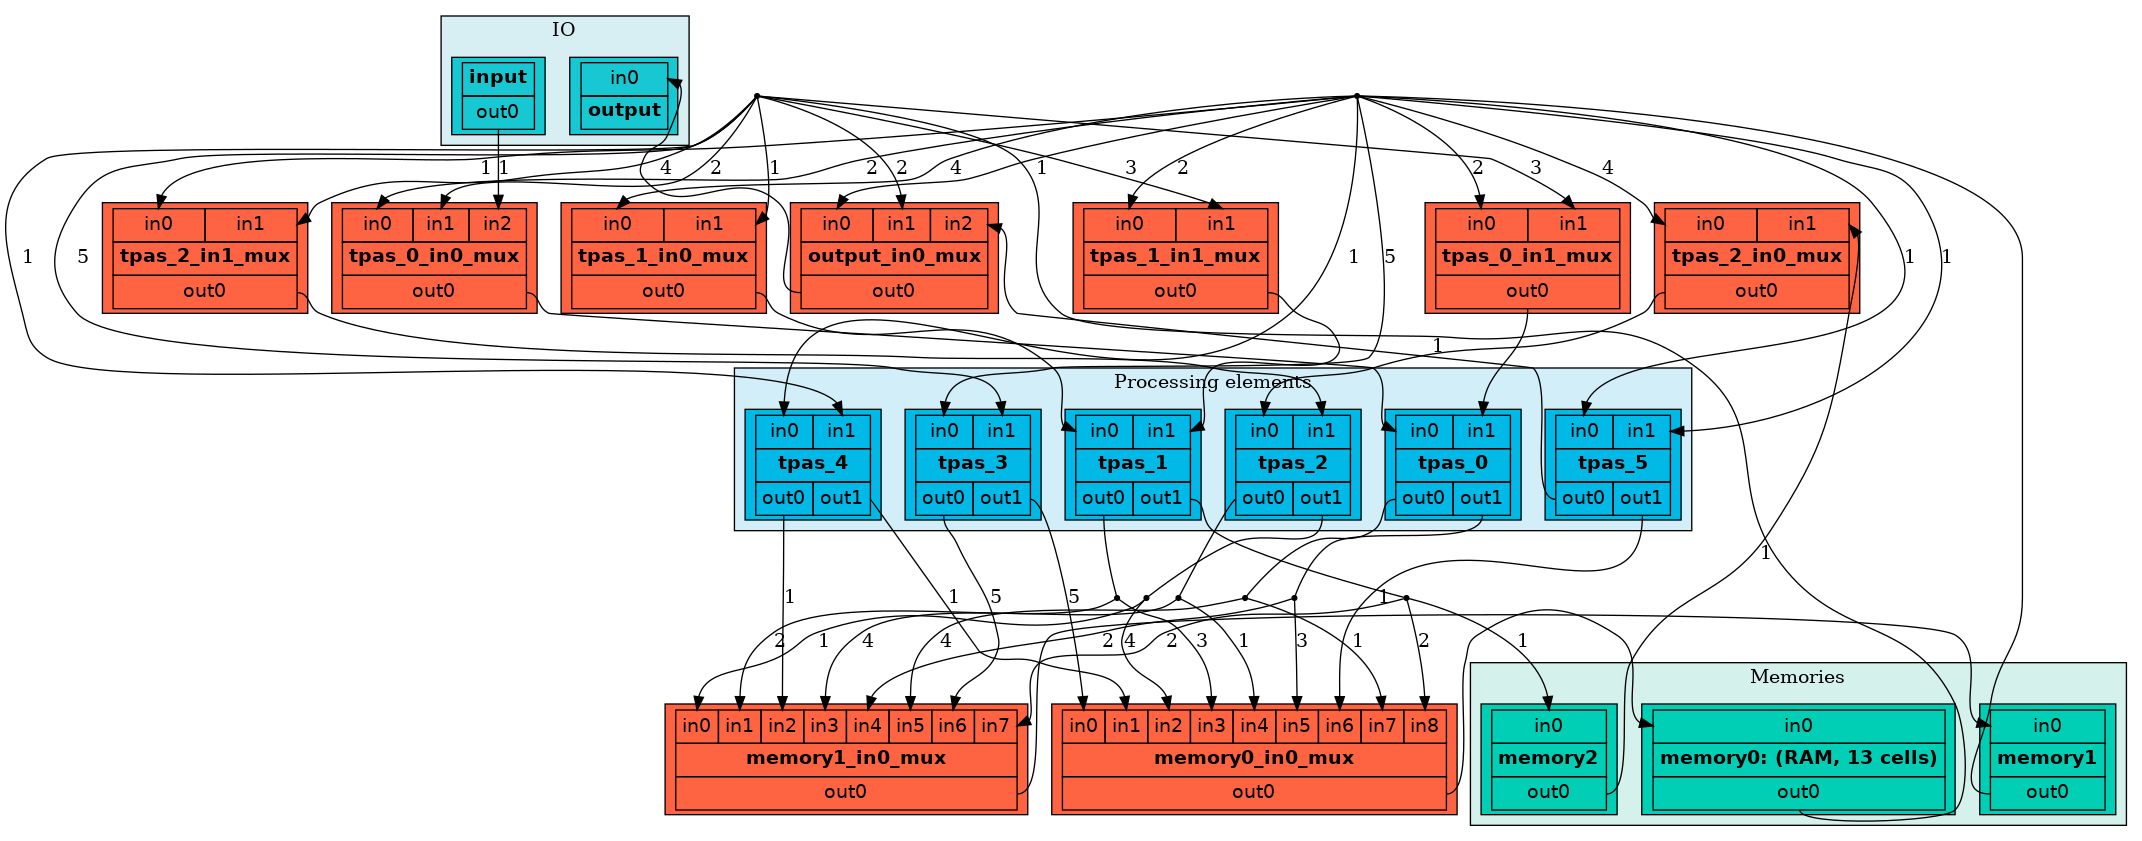

In [ ]:
arch.move_process("sym2p12.0", memories[2], memories[1])
arch.move_process("sym2p2.0", memories[2], memories[1])
arch.move_process("sym2p5.0", memories[2], memories[1])
arch.move_process("sym2p19.0", memories[2], memories[1])
arch

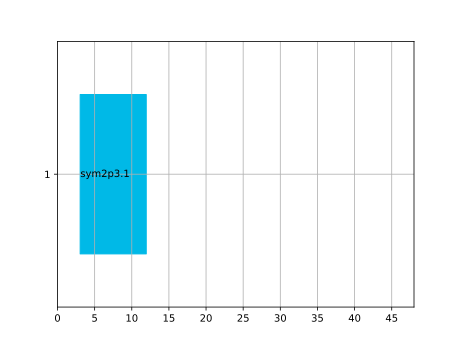

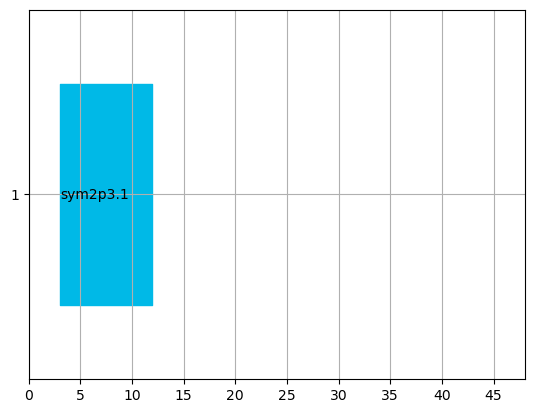

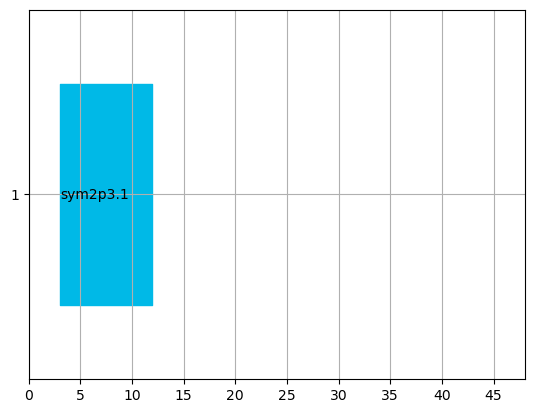

In [ ]:
memories[2].collection

Memories:		 3


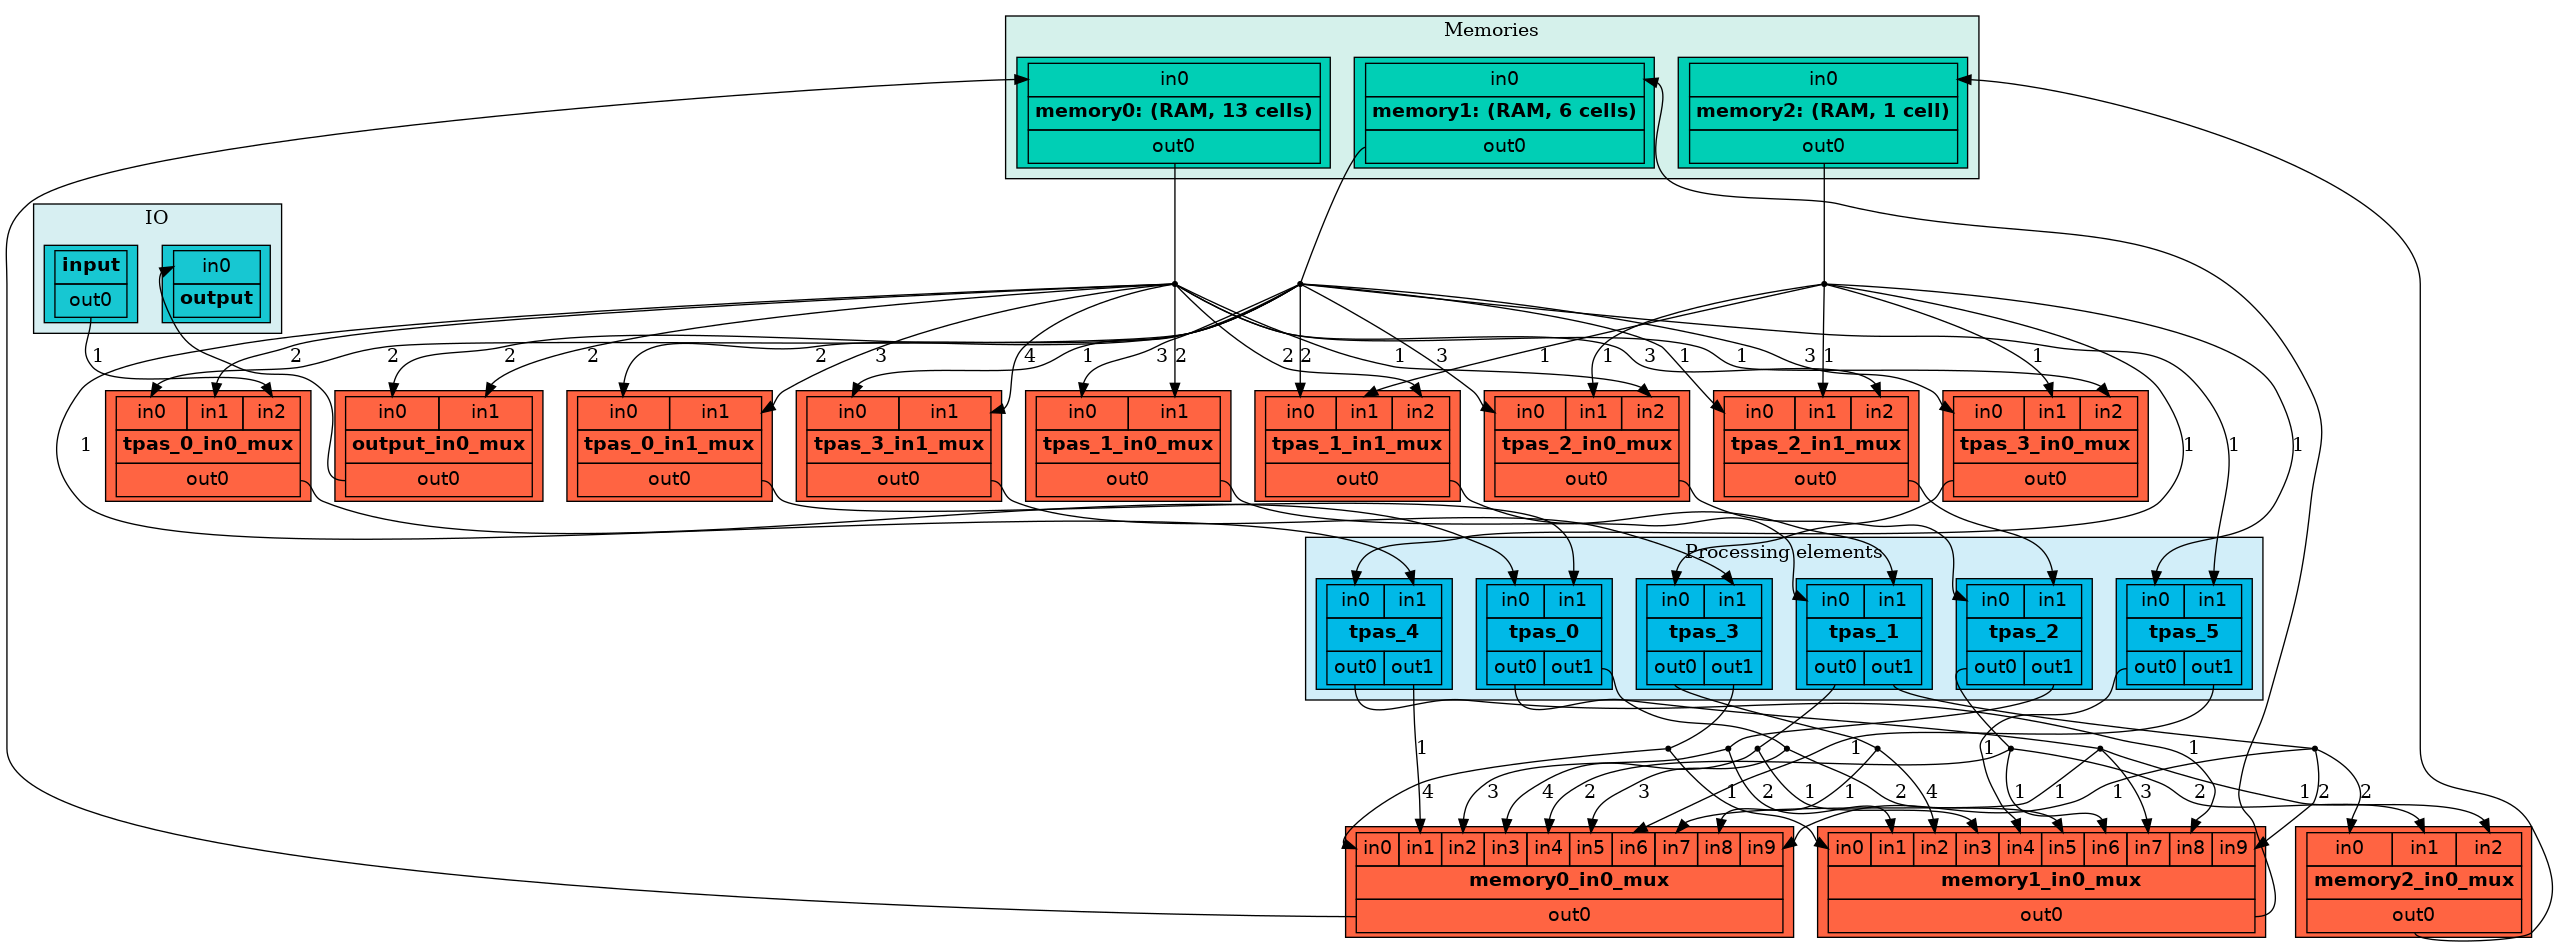

In [14]:
#schedule.swap_io_of_operation("sym2p0")
#schedule.swap_io_of_operation("sym2p1")
schedule.swap_io_of_operation("sym2p2")
#schedule.swap_io_of_operation("sym2p3")
schedule.swap_io_of_operation("sym2p4")
#schedule.swap_io_of_operation("sym2p5")
schedule.swap_io_of_operation("sym2p6")
#schedule.swap_io_of_operation("sym2p7")
#schedule.swap_io_of_operation("sym2p8")
#schedule.swap_io_of_operation("sym2p9")
#schedule.swap_io_of_operation("sym2p10")
#schedule.swap_io_of_operation("sym2p11")
#schedule.swap_io_of_operation("sym2p12")
#schedule.swap_io_of_operation("sym2p13")
#schedule.swap_io_of_operation("sym2p14")
#schedule.swap_io_of_operation("sym2p15")
#schedule.swap_io_of_operation("sym2p16")
#schedule.swap_io_of_operation("sym2p17")
#schedule.swap_io_of_operation("sym2p18")
#schedule.swap_io_of_operation("sym2p19")
#schedule.swap_io_of_operation("sym2p20")
#schedule.swap_io_of_operation("sym2p21")
#schedule.swap_io_of_operation("sym2p22")
mem_vars = schedule.get_memory_variables()
direct, mem_vars = mem_vars.split_on_length()
mem_vars_set = mem_vars.split_on_ports(read_ports=1, write_ports=1, total_ports=1)

print("Memories:\t\t", len(mem_vars_set))

memories = []
for i, mem in enumerate(mem_vars_set):
    memory = Memory(mem, memory_type="RAM", entity_name=f"memory{i}")
    memories.append(memory)
    #mem.show(title=f"{memory.entity_name}")
    memory.assign("left_edge")
    #memory.show_content(title=f"Assigned {memory.entity_name}")

ops = schedule.get_operations()
tpas = ops.get_by_type_name("sym2p").split_on_execution_time()
ins = ops.get_by_type_name("in")
outs = ops.get_by_type_name("out")

p0 = ProcessingElement(tpas[0], entity_name="tpas_0")
p1 = ProcessingElement(tpas[1], entity_name="tpas_1")
p2 = ProcessingElement(tpas[2], entity_name="tpas_2")
p3 = ProcessingElement(tpas[3], entity_name="tpas_3")
p4 = ProcessingElement(tpas[4], entity_name="tpas_4")
p5 = ProcessingElement(tpas[5], entity_name="tpas_5")
p_in = ProcessingElement(ins, entity_name="input")
p_out = ProcessingElement(outs, entity_name="output")

arch = Architecture({p0, p1, p2, p3, p4, p5, p_in, p_out}, memories, direct_interconnects=direct)
arch

Comments: